In [1]:
import csv
import pandas as pd
dataset= [[], [], [], [], [], [], []]
col_names = []
print(len(dataset))
with open('dataset/GLT_filtered.csv') as f:
    
    reader = csv.reader(f)
    col_names = next(reader)    #it's start from the beginning and iterate the input list, and after if I iterate with a
                                # for-cicle it'll start not from index 0 but from 1, because the iterator is in position 1
    for row in reader:
        if len(row) == len(col_names):
            for i in range(len(dataset)):
                dataset[i].append(row[i]) 
    
    print(col_names)


7
['Date', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City', 'Country', 'Latitude', 'Longitude']


In [2]:
cities = set(dataset[3]) #upload cities
cities


{'Abidjan',
 'Addis Abeba',
 'Ahmadabad',
 'Aleppo',
 'Alexandria',
 'Ankara',
 'Baghdad',
 'Bangalore',
 'Bangkok',
 'Belo Horizonte',
 'Berlin',
 'BogotÃ¡',
 'Bombay',
 'BrasÃ\xadlia',
 'Cairo',
 'Calcutta',
 'Cali',
 'Cape Town',
 'Casablanca',
 'Changchun',
 'Chengdu',
 'Chicago',
 'Chongqing',
 'Dakar',
 'Dalian',
 'Dar Es Salaam',
 'Delhi',
 'Dhaka',
 'Durban',
 'Faisalabad',
 'Fortaleza',
 'Gizeh',
 'Guangzhou',
 'Harare',
 'Harbin',
 'Ho Chi Minh City',
 'Hyderabad',
 'Ibadan',
 'Istanbul',
 'Izmir',
 'Jaipur',
 'Jakarta',
 'Jiddah',
 'Jinan',
 'Kabul',
 'Kano',
 'Kanpur',
 'Karachi',
 'Kiev',
 'Kinshasa',
 'Lagos',
 'Lahore',
 'Lakhnau',
 'Lima',
 'London',
 'Los Angeles',
 'Luanda',
 'Madras',
 'Madrid',
 'Manila',
 'Mashhad',
 'Melbourne',
 'Mexico',
 'Mogadishu',
 'Montreal',
 'Moscow',
 'Nagoya',
 'Nagpur',
 'Nairobi',
 'Nanjing',
 'New Delhi',
 'New York',
 'Paris',
 'Peking',
 'Pune',
 'Rangoon',
 'Rio De Janeiro',
 'Riyadh',
 'Rome',
 'Saint Petersburg',
 'Salvador',
 '

## 2.1 -  How many of them are nominal, how many continuous or discrete?


In my opinion the set composed by AvgTemp and AvgTempUncertainty are **continious** value and are _ratio_ attributes. Date, Latitude, Longitude are **discrete** with _interval_ attributes. City and Country are **nominal** attributes.

In [3]:
city_temp = [temp for i, temp in enumerate(dataset[1]) if 'Addis Abeba' ==dataset[3][i]]

example = ['','','15','','10','', '', '', '30']
print(example)

['', '', '15', '', '10', '', '', '', '30']


In [4]:
def fill_empty(temp_list):
    
    right_i = 0
    right_v = 0
    
    for i, v in enumerate(temp_list):
        
        left_v = float(temp_list[i-1]) if i!=0 else 0
        
        #if the right value is far it means that there are many empty spaces, so the right_v is the same, but it changes the left_v
        if i< right_i:
            temp_list[i] = (right_v+left_v)/2
            continue
            
        if v=='':
        
            for j in range(i+1,len(temp_list)):
                
                if temp_list[j]!='':
                    right_v = float(temp_list[j])
                    break
                
            if i == len(temp_list)-1:
                right_v = 0
            
            right_i = j
            temp_list[i] = (left_v + right_v)/2
            
        
        else: float(temp_list[i])
        
        
        
    

In [5]:
print(example, "\n_______________________________________________________________________________________")
fill_empty(example)
example

['', '', '15', '', '10', '', '', '', '30'] 
_______________________________________________________________________________________


[7.5, 11.25, '15', 12.5, '10', 20.0, 25.0, 27.5, '30']

In [6]:
#so it works, now do it to all db 
#two dictionaries, but it doesn't fill gaps in original DB
avg_temp = {}
avg_temp_uncertain = {}

for city in cities:
    #i save idexs by city and then create list with the temp
    idxs = [i for i, value in enumerate(dataset[3]) if city== value]
    avg_temp[city] = [dataset[1][i] for i in idxs]
    avg_temp_uncertain[city] = [dataset[2][i] for i in idxs]
    
avg_temp['Addis Abeba']
for city in cities:
    fill_empty(avg_temp[city])
    fill_empty(avg_temp_uncertain[city])

avg_temp['Addis Abeba']

['15.986',
 '18.345',
 '18.632',
 '18.154',
 17.6685,
 '17.183',
 '16.449',
 '16.358',
 '16.184',
 '15.616',
 '15.126',
 16.232,
 16.785,
 17.061500000000002,
 17.19975,
 17.268875,
 17.3034375,
 17.32071875,
 17.329359375000003,
 17.333679687500002,
 17.33583984375,
 17.336919921875,
 17.3374599609375,
 17.33772998046875,
 17.337864990234376,
 17.337932495117187,
 17.337966247558594,
 17.337983123779296,
 17.33799156188965,
 17.337995780944823,
 17.337997890472412,
 17.337998945236208,
 17.337999472618105,
 17.33799973630905,
 17.337999868154526,
 17.337999934077263,
 17.337999967038634,
 17.337999983519317,
 17.33799999175966,
 17.33799999587983,
 17.337999997939917,
 17.33799999896996,
 17.33799999948498,
 17.33799999974249,
 17.337999999871244,
 17.337999999935622,
 17.337999999967813,
 17.337999999983907,
 17.337999999991954,
 17.33799999999598,
 17.33799999999799,
 17.337999999998996,
 17.337999999999496,
 17.33799999999975,
 17.337999999999873,
 17.337999999999937,
 17.337999999

In [20]:
def fill_gaps_dict(data):
    right_i = 0
    right_v = 0
    cont = 0
    for i, value in enumerate(data):
        left_v = data[i-1] if i != 0 else 0
        
        # reuse the right_v value, useful when there are multiple consecutive missing values
        if i < right_i:
            data[i] = (left_v + right_v) / 2
            continue

        if value == '':
            try:
                # use a generator to search for the first occurrence 
                print(f"Iterazione: {cont}; right_v {right_v}, right_i {right_i}")
                right_i, right_v = next((idx+i+1, float(v)) for idx, v in enumerate(data[i+1:]) if v != '')
                print(f"Post next: right_v {right_v}, right_i {right_i}")
                cont+=1
                print("-----------------------------------------------------------------------------------------------")
            except StopIteration: # fired when the generator has no items left to iterate on
                right_i = len(data)
                right_v = 0
            data[i] = (left_v + right_v) / 2
        else:
            data[i] = float(data[i]) # parse to float all present values

In [8]:
example = ['', '', '15', '', '10', '', '', '', '30']
fill_gaps(example)

NameError: name 'fill_gaps' is not defined

## Solution, rewrite DB

In [9]:
#so, to rewrite db we need the function fill_gaps with the dtatset[3] all cities rows and dataset[1,2] which are the value
def fill_gaps(data, cities):
    right_i = 0
    right_v = 0
    
    for i, value in enumerate(data):
        if i == 0 or cities[i] != cities[i-1]:
            left_v = 0
        else:
            left_v = data[i-1]

        # reuse the right_v value, useful when there are multiple consecutive missing values
        if i < right_i:
            data[i] = (left_v + right_v) / 2
            continue

        if value == '':
            for j in range(i+1, len(data)):
                if cities[j] != cities[i]: # this check must come before
                    right_v = 0
                    break
                elif data[j] != '':
                    right_v = float(data[j])
                    break

            if i == len(data)-1: # edge case: the last value of the last city is empty
                right_v = 0

            right_i = j 
            data[i] = (left_v + right_v) / 2

        else:
            data[i] = float(data[i]) # parse to float all present values

Here we count the missing value before the filling

In [10]:
tot_count = len(dataset[1])
count_temp_missing = len([missing_v for i, missing_v in enumerate(dataset[1]) if missing_v == ''])
count_uncertain_temp_missing = len([missing_v for i, missing_v in enumerate(dataset[2]) if missing_v == ''])

print(f"The percentage of missing value in AvgTemp is: {100*(count_temp_missing)/tot_count}")
print(f"The percentage of missing value in AvgTemp is: {100*(count_uncertain_temp_missing)/tot_count}")

The percentage of missing value in AvgTemp is: 12.561083912102927
The percentage of missing value in AvgTemp is: 12.561083912102927


In [11]:
#for avg_temp
fill_gaps(dataset[1], dataset[3])
#for avg_uncertain_tempq
fill_gaps(dataset[2], dataset[3])



Here we count the missing value after the filling


In [12]:
tot_count = len(dataset[1])
count_temp_missing = len([missing_v for i, missing_v in enumerate(dataset[1]) if missing_v == ''])
count_uncertain_temp_missing = len([missing_v for i, missing_v in enumerate(dataset[2]) if missing_v == ''])

print(f"The percentage of missing value in AvgTemp is: {100*(count_temp_missing)/tot_count}")
print(f"The percentage of missing value in AvgTemp is: {100*(count_uncertain_temp_missing)/tot_count}")

The percentage of missing value in AvgTemp is: 0.0
The percentage of missing value in AvgTemp is: 0.0


In [13]:
#without dictionaries
def print_temp_by_city(n_max, city):
    temp_list = sorted([temp for i, temp in enumerate(dataset[1]) if city== dataset[3][i]], reverse = True)
    print(f"The N hottest temperatures in {city} are: {temp_list[0:n_max]}")
    print(f"The N coldest temperatures in {city} are: {temp_list[-1:-(n_max+1):-1]}")
print_temp_by_city(5,'Addis Abeba')



The N hottest temperatures in Addis Abeba are: [21.223000000000006, 21.156, 20.826, 20.685, 20.512]
The N coldest temperatures in Addis Abeba are: [14.527999999999999, 14.913, 14.98, 15.056, 15.066999999999998]


In [27]:
#with dictionaries  
#need to fill gaps and trasform to float
for city in cities:
    fill_gaps_dict(avg_temp[city])
def print_temp_by_city(n_max, city, dictionaries):
    srtd = sorted(avg_temp[city], reverse = True)
    print(f"The N hottest temperatures in {city} are: {srtd[0:n_max]}")
    print(f"The N coldest temperatures in {city} are: {srtd[-1:-(n_max+1):-1]}")
print_temp_by_city(5,'Rome', avg_temp)

The N hottest temperatures in Rome are: [25.951, 24.998, 24.873, 24.730999999999998, 24.48]
The N coldest temperatures in Rome are: [-1.4410000000000005, -1.3039999999999994, -1.0189999999999997, -0.871, -0.7829999999999999]


## Plot


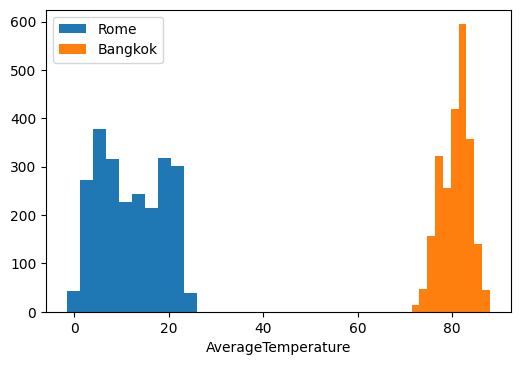

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

for city in ['Rome', 'Bangkok']:
    plt.hist(avg_temp[city], label=city)
plt.legend()
_ = plt.xlabel('AverageTemperature')

## Mean, std -->comparing


In [30]:
import numpy as np

print(f"Rome mean: {np.mean(avg_temp['Rome']):.2f}, std: {np.std(avg_temp['Rome']):.2f}")
print(f"Bankgog mean: {np.mean(avg_temp['Bangkok']):.2f}, std: {np.std(avg_temp['Bangkok']):.2f}")

Rome mean: 12.01, std: 6.69
Bankgog mean: 80.73, std: 3.04


In [48]:
def convert_degree(deg_fara):
    return (deg_fara-32)/1.8

In [47]:
print(avg_temp['Bangkok'][0:5])

[75.182, 80.2148, 82.21640000000001, 84.4268, 81.29480000000002]


In [49]:
celsius_bangkok = [convert_degree(fara) for fara in avg_temp['Bangkok']]

In [51]:
celsius_bangkok[0:5]

[23.990000000000002,
 26.785999999999998,
 27.898000000000003,
 29.125999999999998,
 27.386000000000013]

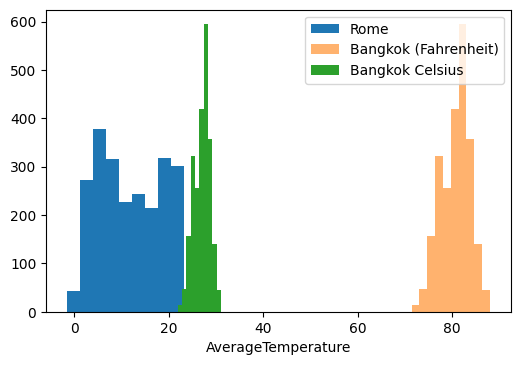

In [54]:

plt.rcParams['figure.dpi'] = 100
plt.hist(avg_temp['Rome'], label='Rome')
plt.hist(avg_temp['Bangkok'], label='Bangkok (Fahrenheit)', alpha=0.6)
plt.hist(celsius_bangkok, label = 'Bangkok Celsius')
plt.legend()
_ = plt.xlabel('AverageTemperature')



Just a way to call the fucntion one time for all the temperatures

In [72]:
def convert_degree_all(deg_fara):
    cel_all = [((c-32)/1.8)  for i, c in enumerate(deg_fara)]
    
    return cel_all

In [73]:
celsius_bangkok_all = convert_degree_all(avg_temp['Bangkok']) 

In [74]:
#print(avg_temp['Bangkok'])
celsius_bangkok_all[0:5]

[23.990000000000002,
 26.785999999999998,
 27.898000000000003,
 29.125999999999998,
 27.386000000000013]